# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
import warnings 
import re

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data.rename(columns={'X': 'age', 'Y': 'tardies'}, inplace=True)

Draw a dispersion diagram (scatter plot) for the data.

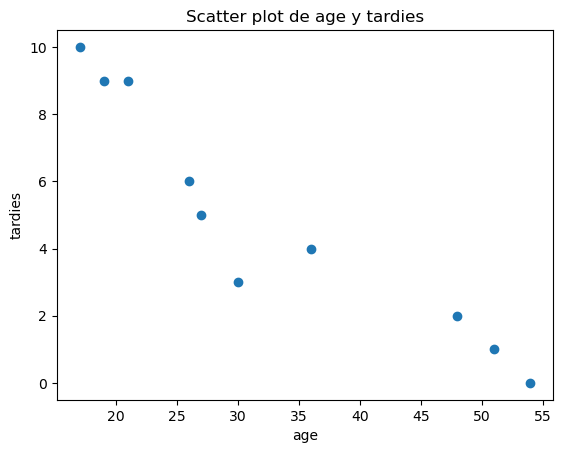

In [4]:
plt.scatter(student_data['age'], student_data['tardies'])
plt.xlabel('age')
plt.ylabel('tardies')
plt.title('Scatter plot de age y tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
#A mayor edad, cada vez tienen menos retrasos, mientras mas jovenes mas retrasos.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
from scipy import stats

In [6]:
stats.pearsonr(student_data['age'], student_data['tardies'])

PearsonRResult(statistic=-0.9391626886887123, pvalue=5.5666538345533596e-05)

In [7]:
student_data['age'].std()

13.69874284580726

In [8]:
student_data['tardies'].std()


3.5418137224371984

In [9]:
student_data.corr()

,age,tardies
age,1.000000,-0.939163
tardies,-0.939163,1.000000


In [10]:
student_data.cov()


,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
from sklearn.linear_model import LinearRegression as LinReg 
from sklearn.model_selection import train_test_split as tts

In [12]:
linreg=LinReg()

In [13]:
X=student_data.drop(['tardies'], axis=1)  # separacion X y

y=student_data.tardies

In [14]:
X_train, X_test, y_train, y_test  = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [15]:
linreg.fit(X_train, y_train)

LinearRegression()

In [16]:
linreg.predict(X_test)

array([-0.93093923, -0.13121547])

In [17]:
linreg.intercept_ #ordenada en el origen donde corta ese en el eje y

13.464088397790054

In [18]:
linreg.coef_[0] #la pendiente, inclinacion de la recta

-0.266574585635359

Plot your regression model on your scatter plot.

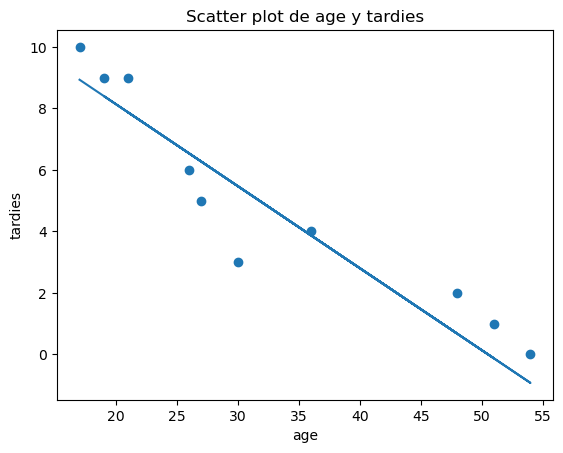

In [19]:
plt.scatter(student_data['age'], student_data['tardies'])

plt.plot(student_data['age'], (linreg.coef_[0]*student_data.age+linreg.intercept_)) #y= m*x+b
                                                                                        #m=pendiente, x= linregcoef, b= linreg.intercept_

plt.xlabel('age')
plt.ylabel('tardies')
plt.title('Scatter plot de age y tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [20]:
# la linea de regresion se ajusta a la hipotesis

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [22]:
df = pd.read_csv('./vehicles.csv')

In [23]:
df.head(5)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [24]:
df.corr()['CO2 Emission Grams/Mile']


Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

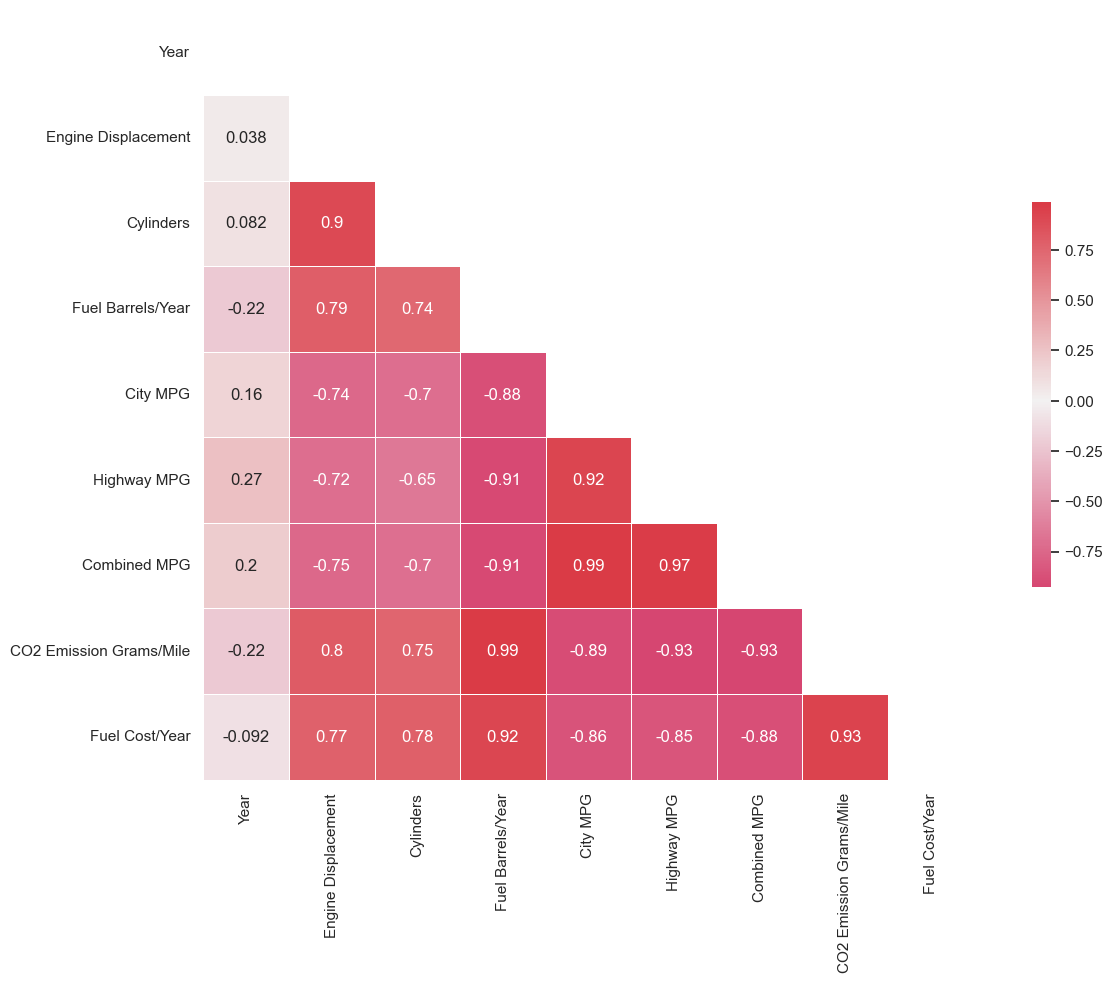

In [25]:
plt.figure(figsize=(15, 10))
sns.set(style='white')
mask=np.triu(np.ones_like(df.corr(), dtype=bool))
cmap=sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [28]:
#Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year

In [29]:
df.drop(['Make', 'Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class' ], axis=1, inplace=True)


In [30]:
df.drop(['Fuel Type', 'City MPG', 'Highway MPG'], axis=1, inplace=True)


In [31]:
linreg=LinReg()

In [32]:
X=df.drop(['CO2 Emission Grams/Mile'], axis=1)  # separacion X y

y=df['CO2 Emission Grams/Mile']

In [33]:
X_train, X_test, y_train, y_test  = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28761, 5), (7191, 5), (28761,), (7191,))

In [34]:
linreg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = linreg.predict(X_test)

In [36]:
linreg.intercept_

755.6935073143169

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,35952.0,2000.716400,10.085290,1984.00,1991.000000,2001.000000,2010.000000,2017.000000
Cylinders,35952.0,5.765076,1.755268,2.00,4.000000,6.000000,6.000000,16.000000
Fuel Barrels/Year,35952.0,17.609056,4.467283,0.06,14.699423,17.347895,20.600625,47.087143
Combined MPG,35952.0,19.929322,5.112409,7.00,16.000000,19.000000,23.000000,56.000000
CO2 Emission Grams/Mile,35952.0,475.316339,119.060773,37.00,395.000000,467.736842,555.437500,1269.571429
Fuel Cost/Year,35952.0,1892.598465,506.958627,600.00,1500.000000,1850.000000,2200.000000,5800.000000


In [38]:
df['CO2 Emission Grams/Mile'].mean()

475.31633925715045

In [39]:
df['CO2 Emission Grams/Mile'].std()

119.06077323591474

In [40]:
from sklearn.metrics import mean_absolute_error as mae  # estos alias son cosa de yona

mae(y_test, y_pred)

7.449672863378683

In [41]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.9794542628636335

In [42]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [43]:
x = df.drop('CO2 Emission Grams/Mile', axis=1)
y = df['CO2 Emission Grams/Mile']

modelo = sm.OLS(y, x).fit()

In [44]:
pred = modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Fri, 26 May 2023   Prob (F-statistic):                        0.00
Time:                             12:56:23   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# Existe Correlación directa con : Fuel Barrels/Year, Fuel Cost/Year, Displacement y Correlación inversa con:  Highway MPG, Combined MPG 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 